<a href="https://colab.research.google.com/github/roshantac/ERA/blob/main/Session10/Cifar_with_resnet_90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf *.py
!rm -rf ERA/

In [1]:
!git clone https://github.com/roshantac/ERA.git
!cp ERA/Session10/*.py .

Cloning into 'ERA'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 141 (delta 68), reused 23 (delta 11), pack-reused 0
Receiving objects: 100% (141/141), 876.14 KiB | 8.04 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [3]:
ls

base_functions.py  dataset.py  model.py      sample_data/
data/              ERA/        __pycache__/  train_test_val.py


In [1]:
!nvidia-smi

Fri Jul 21 16:04:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
%matplotlib inline
!pip install torchsummary
!pip install torch_lr_finder

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

#Import DataSet


In [3]:
from dataset import *
trainloader, testloader, testloader2, classes = get_data_alb()

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [17]:
from model import Net_resnet

#Device

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


# Model with batch normalisation

In [6]:
import torch
#from model import Net_resnet
model = Net_resnet().to(device)

# Summary


In [7]:

from torchsummary import summary

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.78E-03


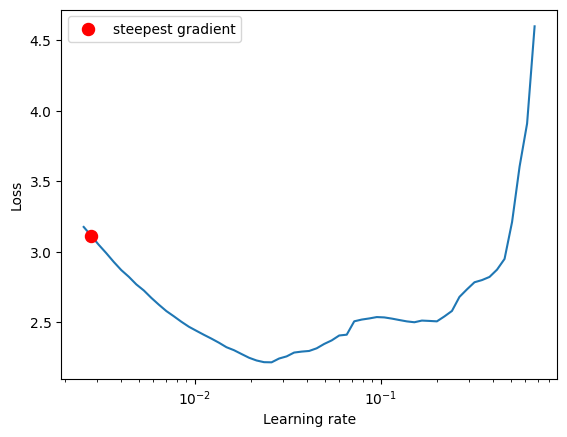

In [8]:
from torch_lr_finder import LRFinder
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=10, num_iter=100)
lr_finder.plot()
lr_finder.reset()

In [9]:
EPOCHS = 24

In [11]:
scheduler = optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=2.78E-03,
        steps_per_epoch=len(trainloader),
        epochs=EPOCHS,
        pct_start=5/EPOCHS,
        div_factor=100,
        three_phase=False,
        final_div_factor=100,
        anneal_strategy='linear'
    )

# Training with Batch norm model

In [12]:
from train_test_val import train_test_evaluate

TTE=train_test_evaluate()
TTE.Training(EPOCHS, model,criterion, device,optimizer, trainloader, testloader,scheduler)


EPOCH: 0


Loss=1.2608146667480469 Batch_id=97 Accuracy=43.35: 100%|██████████| 98/98 [00:21<00:00,  4.61it/s]



Test set: Average loss: 0.0022, Accuracy: 6053/10000 (60.53%)

EPOCH: 1


Loss=0.8777262568473816 Batch_id=97 Accuracy=63.79: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]



Test set: Average loss: 0.0016, Accuracy: 7140/10000 (71.40%)

EPOCH: 2


Loss=0.7739125490188599 Batch_id=97 Accuracy=70.57: 100%|██████████| 98/98 [00:22<00:00,  4.45it/s]



Test set: Average loss: 0.0026, Accuracy: 6004/10000 (60.04%)

EPOCH: 3


Loss=0.8219369053840637 Batch_id=97 Accuracy=72.43: 100%|██████████| 98/98 [00:21<00:00,  4.47it/s]



Test set: Average loss: 0.0017, Accuracy: 7089/10000 (70.89%)

EPOCH: 4


Loss=0.7433007955551147 Batch_id=97 Accuracy=72.56: 100%|██████████| 98/98 [00:21<00:00,  4.50it/s]



Test set: Average loss: 0.0019, Accuracy: 6878/10000 (68.78%)

EPOCH: 5


Loss=0.730861246585846 Batch_id=97 Accuracy=72.84: 100%|██████████| 98/98 [00:21<00:00,  4.56it/s]



Test set: Average loss: 0.0028, Accuracy: 5454/10000 (54.54%)

EPOCH: 6


Loss=0.7242394685745239 Batch_id=97 Accuracy=74.57: 100%|██████████| 98/98 [00:21<00:00,  4.53it/s]



Test set: Average loss: 0.0018, Accuracy: 6766/10000 (67.66%)

EPOCH: 7


Loss=0.6643512845039368 Batch_id=97 Accuracy=75.00: 100%|██████████| 98/98 [00:22<00:00,  4.43it/s]



Test set: Average loss: 0.0023, Accuracy: 6131/10000 (61.31%)

EPOCH: 8


Loss=0.7769508361816406 Batch_id=97 Accuracy=75.62: 100%|██████████| 98/98 [00:22<00:00,  4.44it/s]



Test set: Average loss: 0.0018, Accuracy: 6925/10000 (69.25%)

EPOCH: 9


Loss=0.7017421126365662 Batch_id=97 Accuracy=75.71: 100%|██████████| 98/98 [00:21<00:00,  4.46it/s]



Test set: Average loss: 0.0027, Accuracy: 5383/10000 (53.83%)

EPOCH: 10


Loss=0.7104203104972839 Batch_id=97 Accuracy=76.38: 100%|██████████| 98/98 [00:21<00:00,  4.57it/s]



Test set: Average loss: 0.0014, Accuracy: 7752/10000 (77.52%)

EPOCH: 11


Loss=0.7146148085594177 Batch_id=97 Accuracy=76.96: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]



Test set: Average loss: 0.0015, Accuracy: 7475/10000 (74.75%)

EPOCH: 12


Loss=0.6882620453834534 Batch_id=97 Accuracy=77.50: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]



Test set: Average loss: 0.0018, Accuracy: 7077/10000 (70.77%)

EPOCH: 13


Loss=0.629401683807373 Batch_id=97 Accuracy=78.28: 100%|██████████| 98/98 [00:21<00:00,  4.47it/s]



Test set: Average loss: 0.0016, Accuracy: 7266/10000 (72.66%)

EPOCH: 14


Loss=0.7534264922142029 Batch_id=97 Accuracy=79.22: 100%|██████████| 98/98 [00:21<00:00,  4.53it/s]



Test set: Average loss: 0.0015, Accuracy: 7519/10000 (75.19%)

EPOCH: 15


Loss=0.6465046405792236 Batch_id=97 Accuracy=79.80: 100%|██████████| 98/98 [00:22<00:00,  4.45it/s]



Test set: Average loss: 0.0012, Accuracy: 7902/10000 (79.02%)

EPOCH: 16


Loss=0.47258689999580383 Batch_id=97 Accuracy=80.91: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]



Test set: Average loss: 0.0012, Accuracy: 7923/10000 (79.23%)

EPOCH: 17


Loss=0.5476747751235962 Batch_id=97 Accuracy=81.99: 100%|██████████| 98/98 [00:21<00:00,  4.63it/s]



Test set: Average loss: 0.0011, Accuracy: 8136/10000 (81.36%)

EPOCH: 18


Loss=0.4533451497554779 Batch_id=97 Accuracy=82.79: 100%|██████████| 98/98 [00:21<00:00,  4.49it/s]



Test set: Average loss: 0.0012, Accuracy: 8003/10000 (80.03%)

EPOCH: 19


Loss=0.4569040536880493 Batch_id=97 Accuracy=83.85: 100%|██████████| 98/98 [00:21<00:00,  4.48it/s]



Test set: Average loss: 0.0009, Accuracy: 8443/10000 (84.43%)

EPOCH: 20


Loss=0.48421409726142883 Batch_id=97 Accuracy=85.48: 100%|██████████| 98/98 [00:21<00:00,  4.50it/s]



Test set: Average loss: 0.0008, Accuracy: 8716/10000 (87.16%)

EPOCH: 21


Loss=0.34623995423316956 Batch_id=97 Accuracy=87.00: 100%|██████████| 98/98 [00:21<00:00,  4.62it/s]



Test set: Average loss: 0.0008, Accuracy: 8630/10000 (86.30%)

EPOCH: 22


Loss=0.31564861536026 Batch_id=97 Accuracy=88.62: 100%|██████████| 98/98 [00:21<00:00,  4.66it/s]



Test set: Average loss: 0.0006, Accuracy: 8986/10000 (89.86%)

EPOCH: 23


Loss=0.2780790627002716 Batch_id=97 Accuracy=90.48: 100%|██████████| 98/98 [00:21<00:00,  4.55it/s]



Test set: Average loss: 0.0005, Accuracy: 9090/10000 (90.90%)



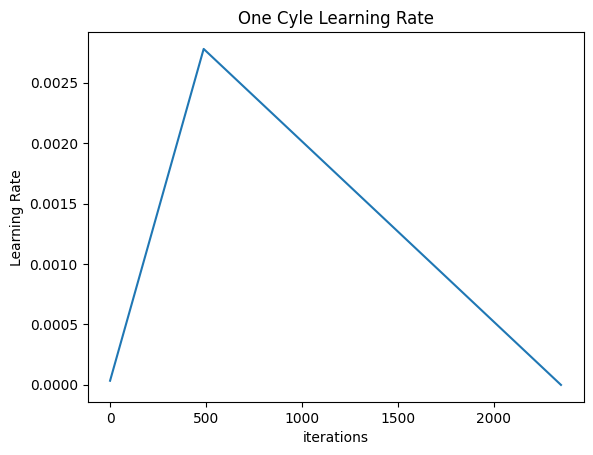

In [13]:
from train_test_val import lernrate
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(lernrate)
plt.xlabel('iterations')
plt.ylabel('Learning Rate')

# displaying the title
plt.title("One Cyle Learning Rate")
plt.show()

# 4. Test Accuracy of each class






In [14]:
TTE.ClassTestAccuracy(testloader,device,model, classes)

Accuracy of plane : 71 %
Accuracy of   car : 100 %
Accuracy of  bird : 100 %
Accuracy of   cat : 50 %
Accuracy of  deer : 85 %
Accuracy of   dog : 66 %
Accuracy of  frog : 90 %
Accuracy of horse : 100 %
Accuracy of  ship : 83 %
Accuracy of truck : 100 %


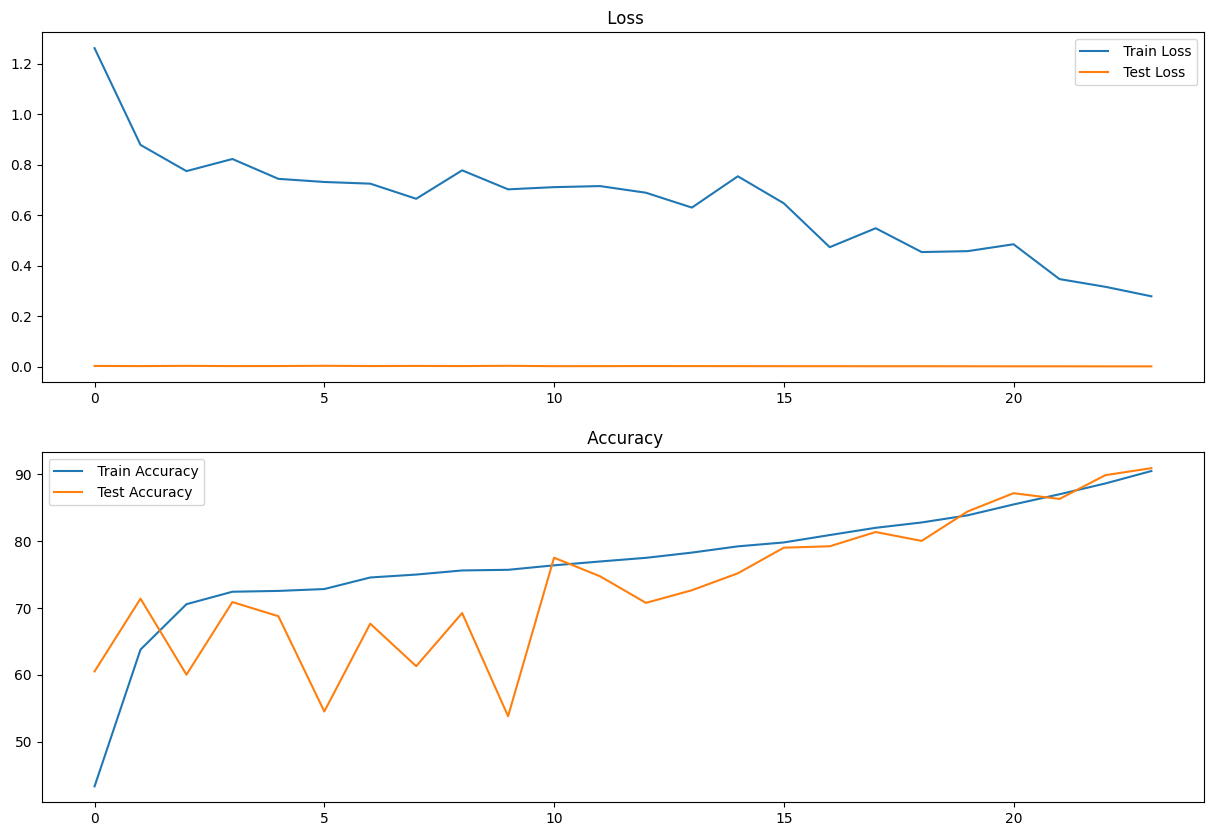

In [15]:
TTE.plotPerformanceGraph()

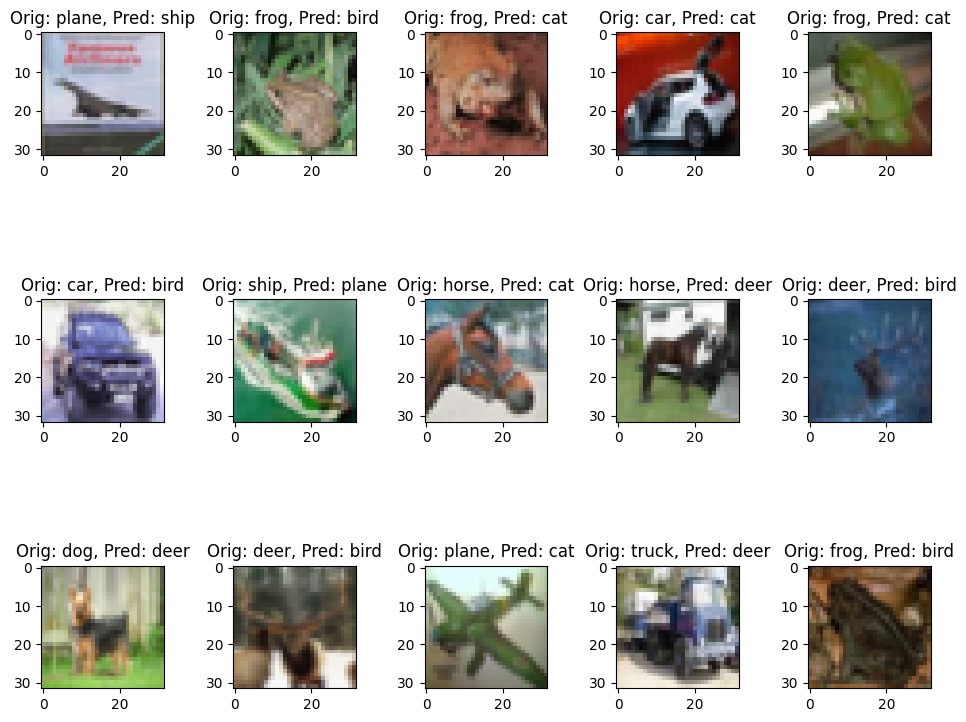

In [16]:
TTE.MissClassifedImage(testloader2,model,device, 15,classes)